In [1]:
#Importing the Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [2]:
img = Image.open('sunflower.jpg')
plt.figure(figsize=(12, 8))
plt.imshow(img);

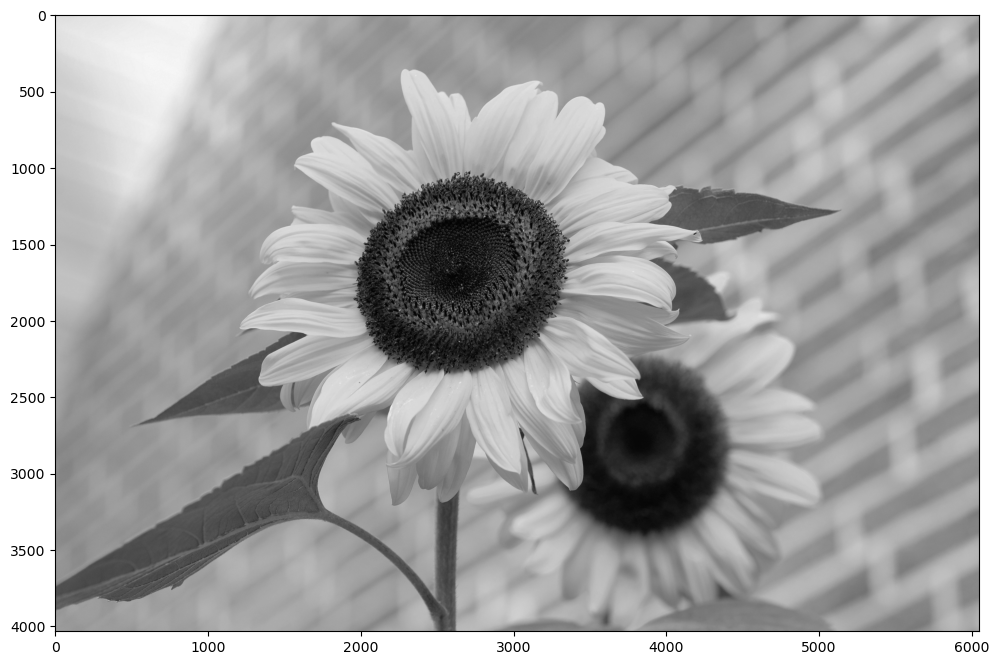

In [3]:
#convert image to black & white
imggray = img.convert('LA')
plt.figure(figsize=(12, 8))
plt.imshow(imggray);

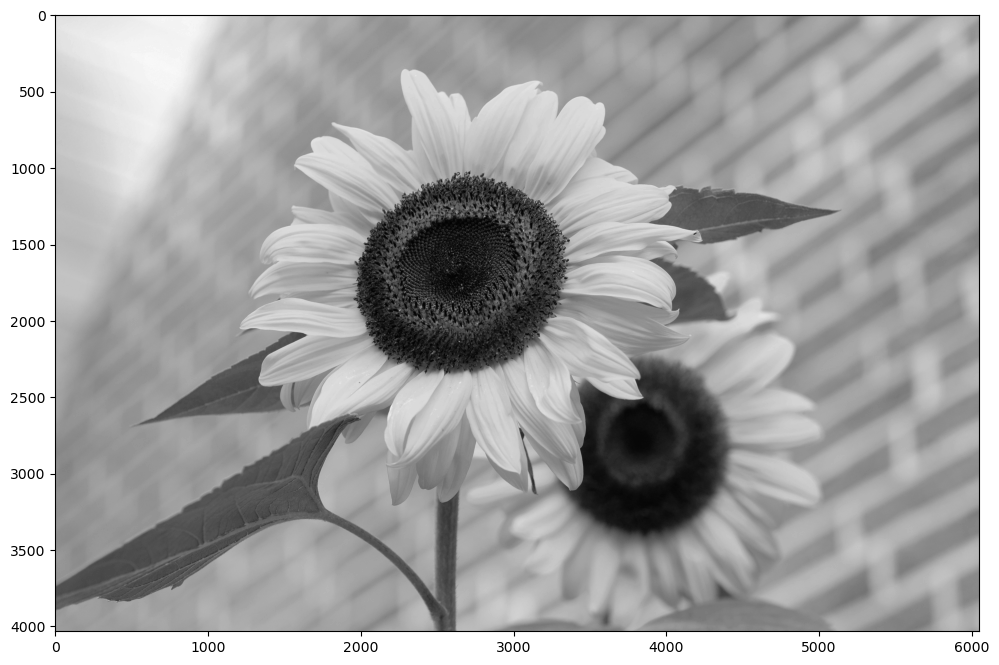

In [4]:
#Converting to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshaping as per the to original image
imgmat.shape = (imggray.size[1], imggray.size[0])
                
plt.figure(figsize=(12, 8))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [5]:
imgmat.shape

(4032, 6048)

In [6]:
 #Applying the SVD on image
U, D, V = np.linalg.svd(imgmat)

In [7]:
#Checking the shape of Matrices
U.shape

(4032, 4032)

In [8]:
D.shape

(4032,)

In [9]:
V.shape

(6048, 6048)

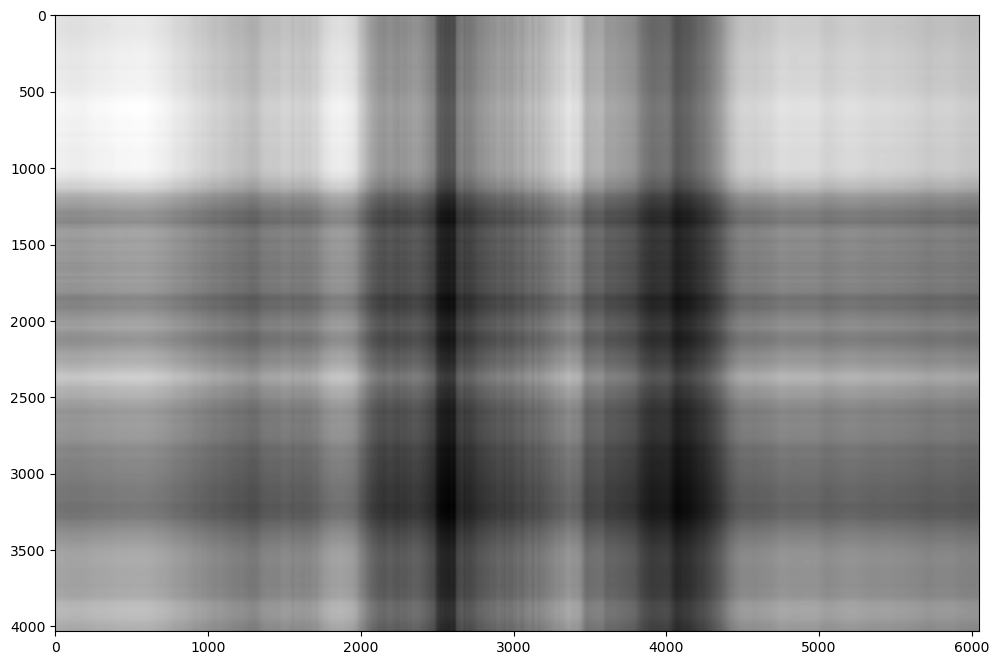

In [10]:
#We know that, Singular values are always ordered from highest to lowest, lets try making use of different number of
#siingular values in re-constructing the image, and see how many we need to re construct a decent image

## Test with 1 sungular value

reconstimg = np.matrix(U[:, :1]) * np.diag(D[:1]) * np.matrix(V[:1, :])
plt.figure(figsize=(12, 8))
plt.imshow(reconstimg, cmap='gray')
plt.show()

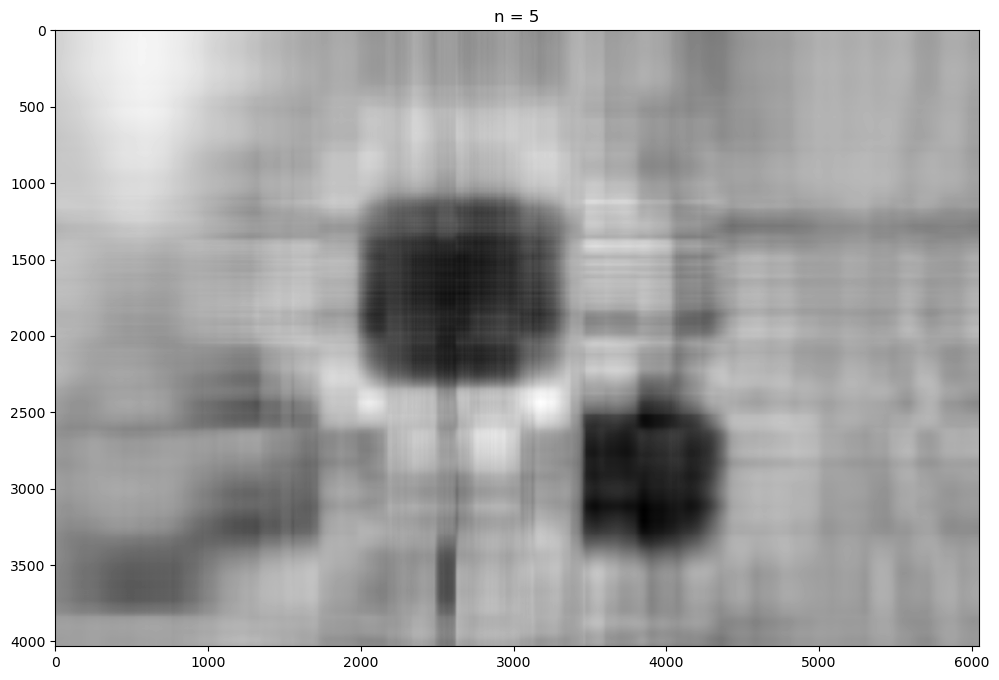

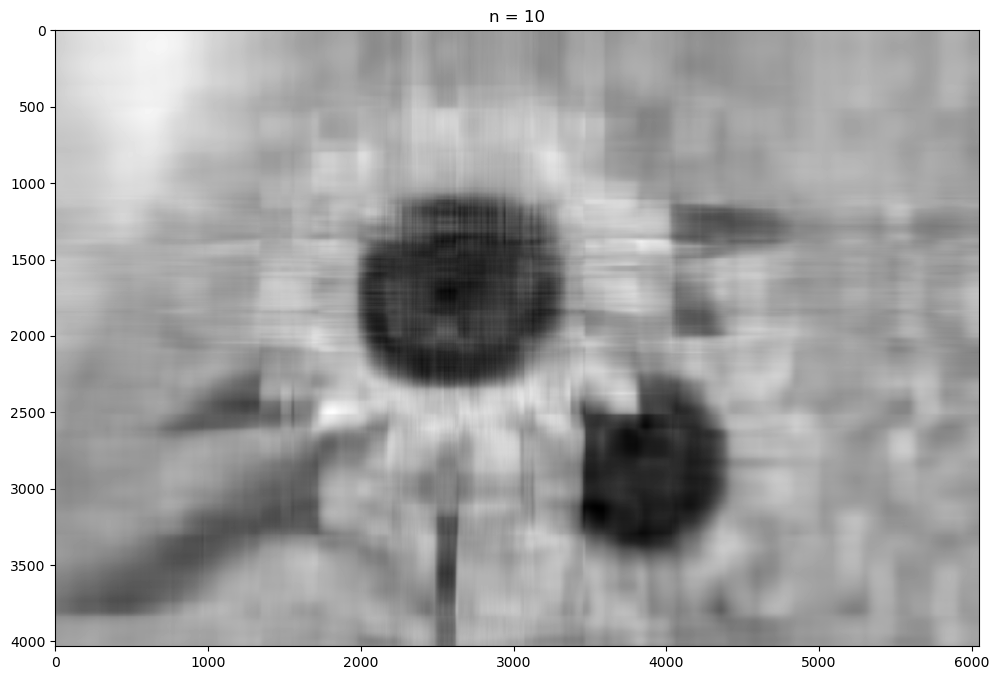

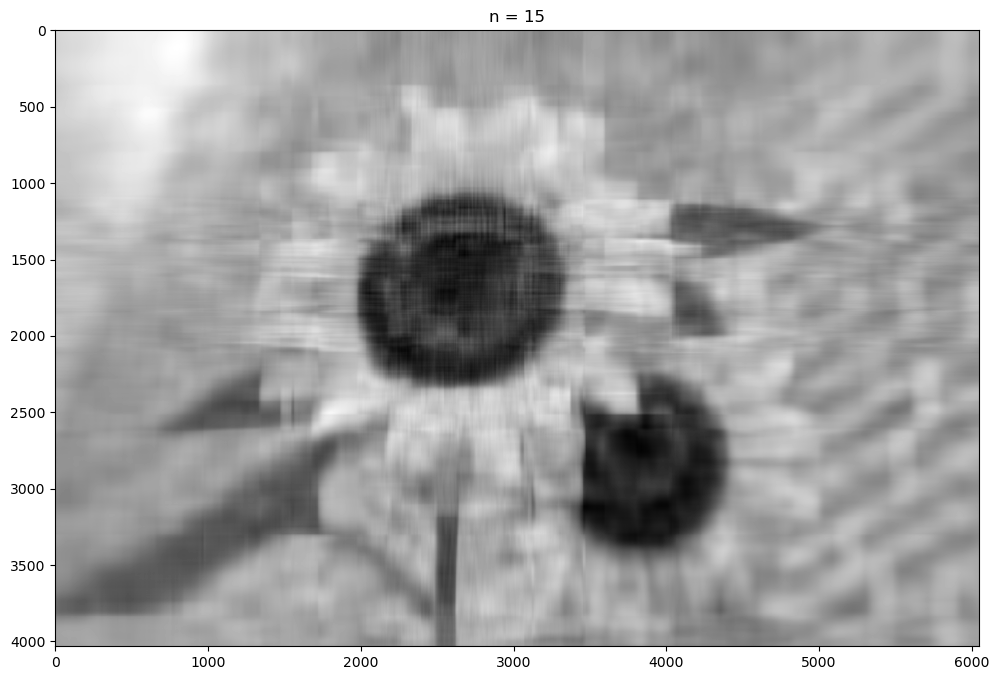

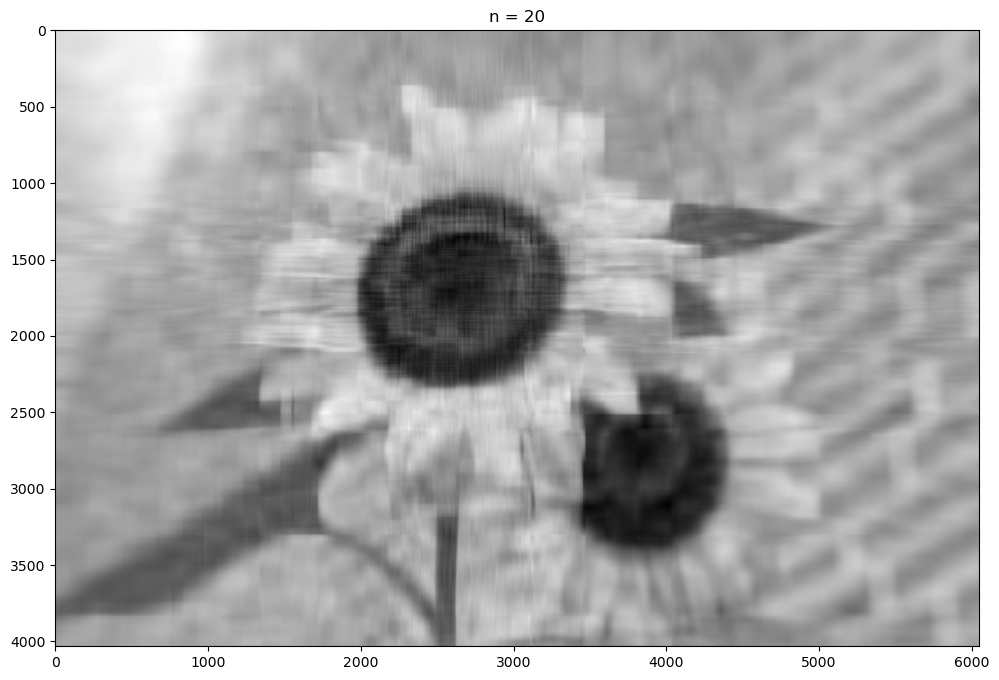

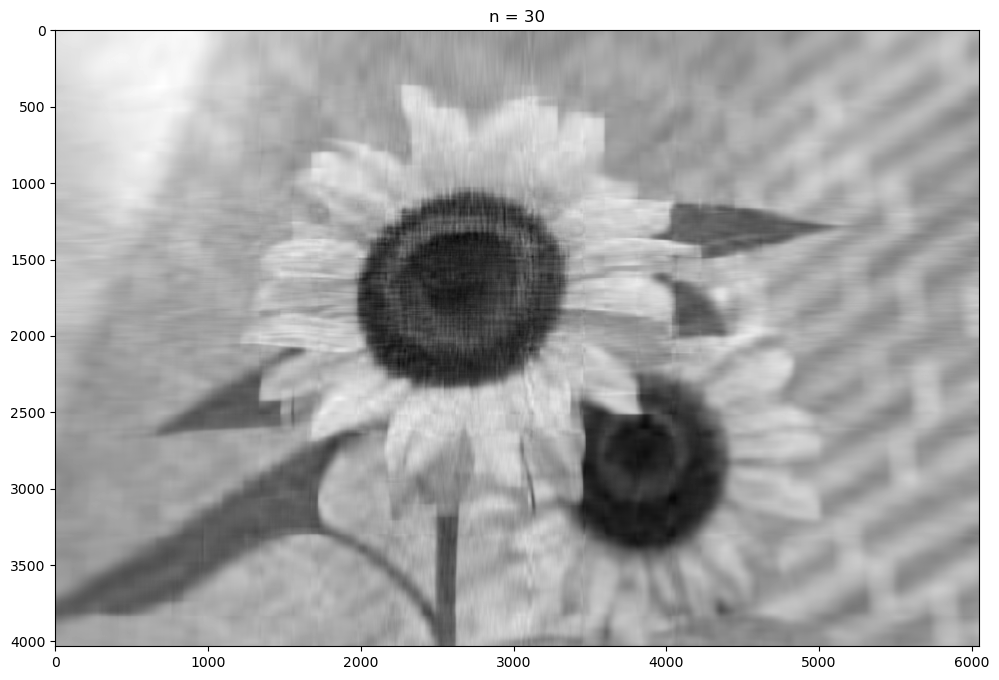

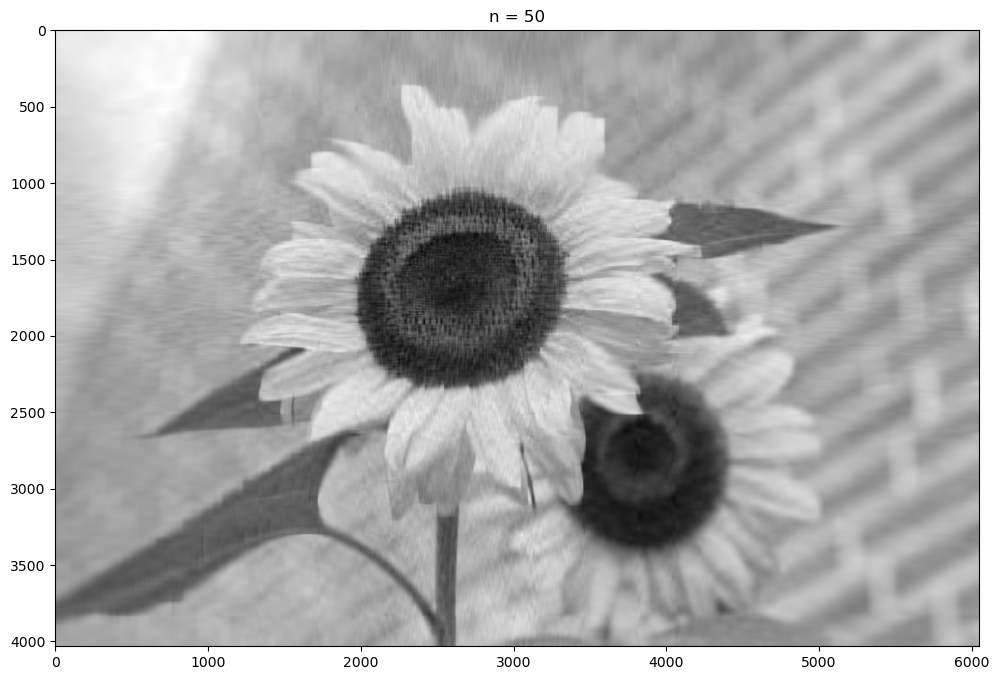

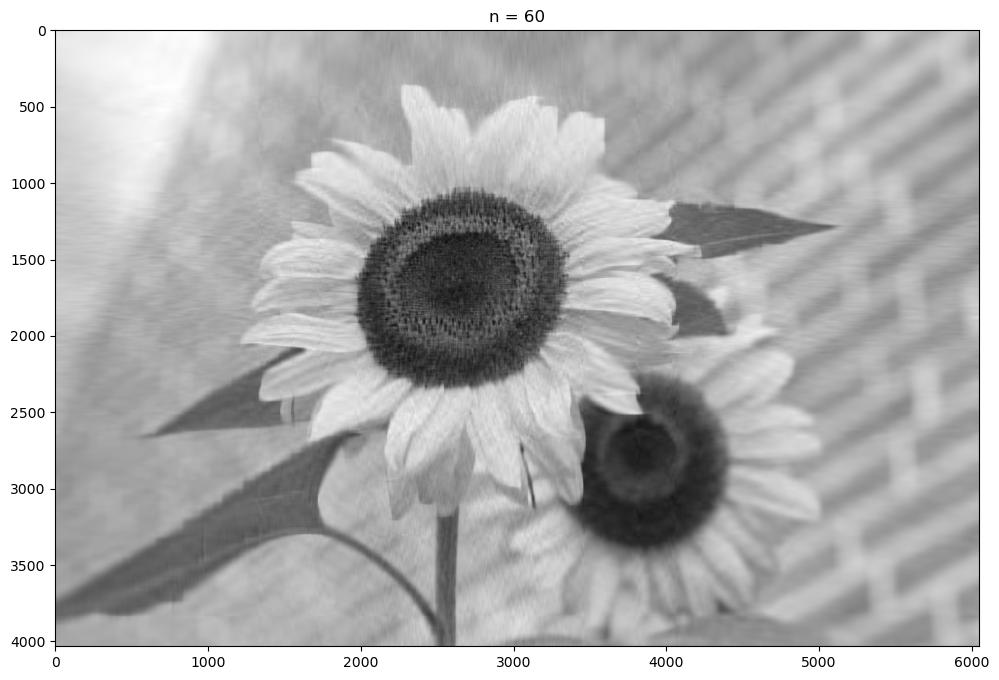

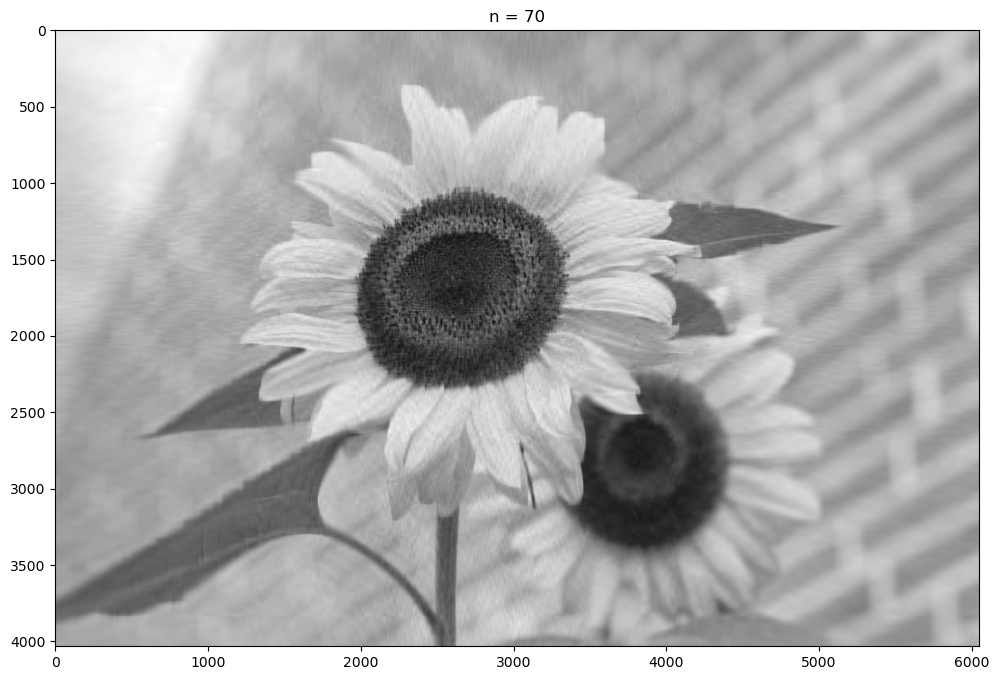

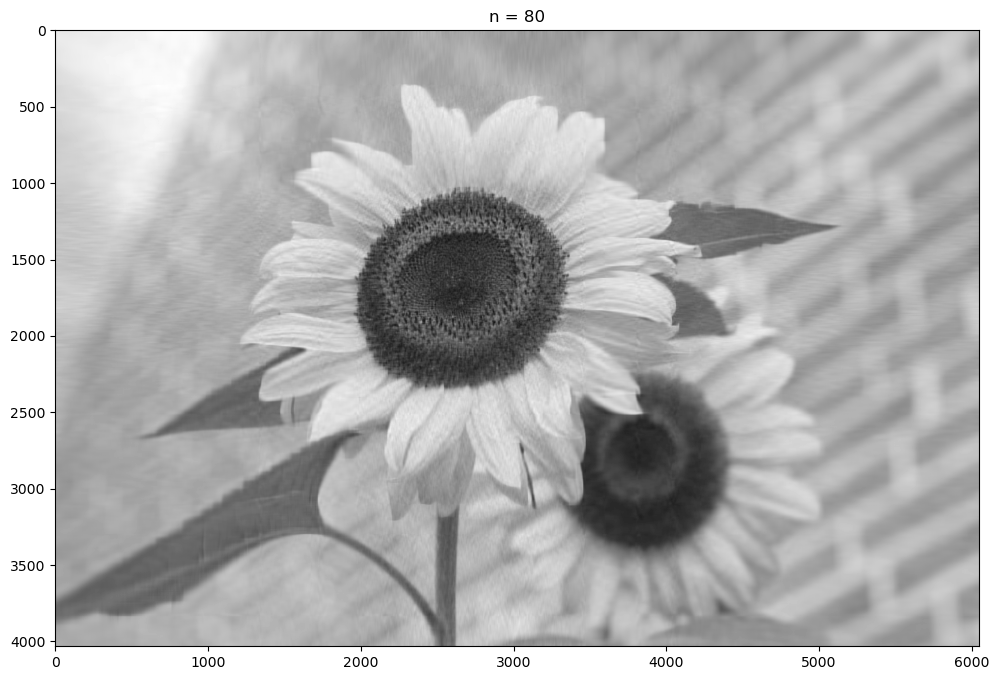

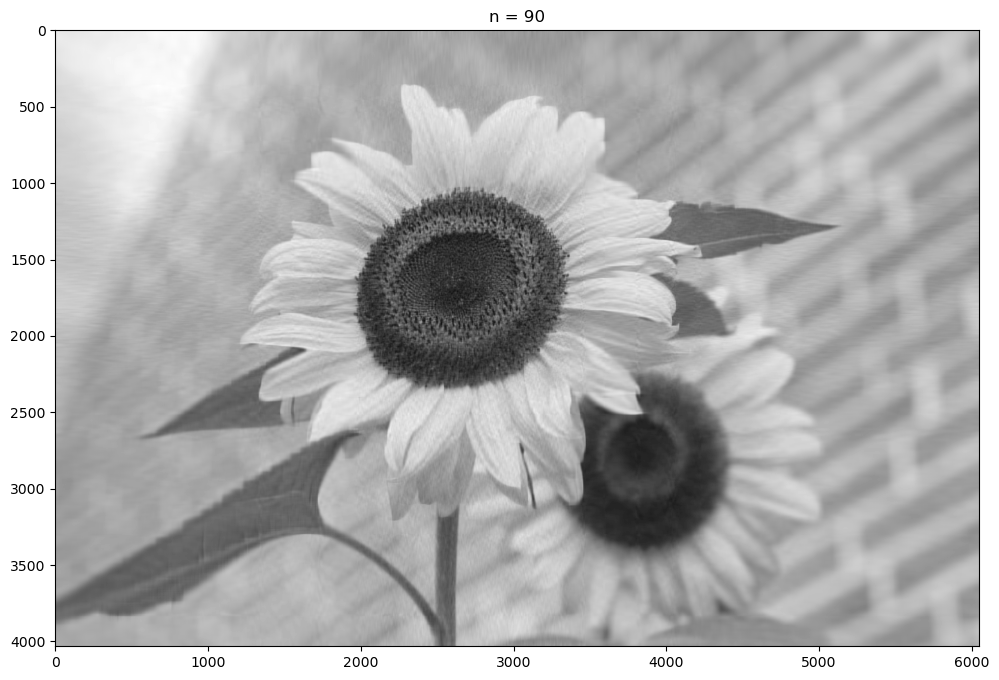

In [11]:
#Lets run for different singular values

for i in [5, 10, 15, 20, 30, 50, 60,70,80,90]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.figure(figsize=(12, 8))
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [ ]:
#from 60 singular value itself we were able to produce a dencent picture

# it will be almost 2.5% of original size